In [2]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import pickle

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values (0-255) to (0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to add a channel dimension (1 channel for grayscale images)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# One-hot encoding for labels (10 classes for Fashion MNIST)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Save the preprocessed data using pickle for later use
with open('fashion_mnist_preprocessed.pkl', 'wb') as f:
    pickle.dump((x_train, y_train, x_test, y_test), f)

# Print the shape of the dataset
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28, 1), y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1), y_test shape: (10000, 10)


In [3]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import pickle

# Load the preprocessed data from the pickle file
with open('fashion_mnist_preprocessed.pkl', 'rb') as f:
    x_train, y_train, x_test, y_test = pickle.load(f)

# Build the Simple CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Optional: Convolutional Layer 3
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Dense Layer 1
model.add(Dense(64, activation='relu'))

# Output Layer (10 classes for Fashion MNIST)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Save the trained model for later use
model.save('simple_cnn_fashion_mnist.h5')

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

C:\Users\rahub\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,554 (236.54 KB)

 Trainable params: 60,554 (236.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6573 - loss: 0.9777 - val_accuracy: 0.8294 - val_loss: 0.4805
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8250 - loss: 0.4822 - val_accuracy: 0.8407 - val_loss: 0.4358
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8535 - loss: 0.4036 - val_accuracy: 0.8602 - val_loss: 0.3858
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8672 - loss: 0.3640 - val_accuracy: 0.8626 - val_loss: 0.3756
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8783 - loss: 0.3306 - val_accuracy: 0.8720 - val_loss: 0.3481
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8825 - loss: 0.3189 - val_accuracy: 0.8793 - val_loss: 0.3329
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8935 - loss: 0.2910 - val_accuracy: 0.8783 - val_loss: 0.3343
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8963 - loss: 0.2814 - val_

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8758 - loss: 0.3586
Test Accuracy: 87.36%


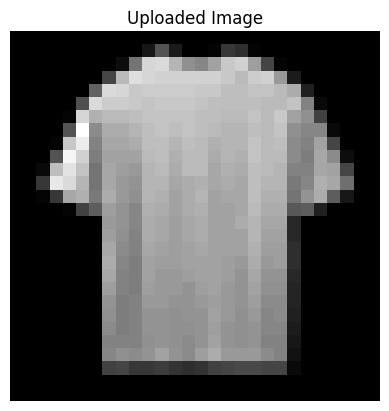

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted class: Shirt


In [4]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Fashion MNIST class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load the trained model
model = load_model('simple_cnn_fashion_mnist.h5')

# Function to preprocess and predict the class of an image
def preprocess_and_predict(image_path):
    # Load the image and resize to 28x28 (Fashion MNIST standard size)
    img = Image.open(image_path).convert('L').resize((28, 28))  # Convert to grayscale

    # Display the image
    plt.imshow(img, cmap='gray')
    plt.title("Uploaded Image")
    plt.axis('off')
    plt.show()

    # Convert image to numpy array and scale pixel values
    img_array = np.array(img).astype('float32') / 255.0
    
    # Reshape to match model input shape (batch_size, height, width, channels)
    img_array = img_array.reshape(1, 28, 28, 1)
    
    # Predict the class of the image
    prediction = model.predict(img_array)
    
    # Get the index of the class with the highest confidence
    predicted_class = np.argmax(prediction)
    
    # Return the predicted class name
    return class_names[predicted_class]

# Example usage: Upload an image (specify the image path here)
image_path = r'C:\Users\rahub\OneDrive\Desktop\test.webp'
predicted_label = preprocess_and_predict(image_path)
print(f"Predicted class: {predicted_label}")